# Gráficas  de series temporales 

In [23]:
import json
import pandas as pd
from utils.extraction import DataProcessor
import numpy as np

In [2]:
mma_processor = DataProcessor(
    file_path="../data/processed/MMA_desinventar.csv",
    date_column="Fecha",
    date_format="%d/%m/%y",
)
mma_processor.load_data()
mma_processor.process_dates()
mma_df = mma_processor.get_data()
print("Datos procesados de MMA:")

# resuelve el problema de la  estación que fue mal ingresada
mma_df.loc[mma_df["CodigoEstacion"] == 520660040, "CodigoEstacion"] = 52060040  # noqa: PLR2004
print(mma_df.head())
# Filtrar por código de estación específico
codigo_estacion = 52060040
mma_filtered_df = mma_df[mma_df["CodigoEstacion"] == codigo_estacion]

# Mostrar las primeras filas del DataFrame filtrado
print(mma_filtered_df.head())

mma_estaciones = mma_df["CodigoEstacion"].unique()

Datos procesados de MMA:
           NombreEstacion  CodigoEstacion    Latitud     Longitud   Municipio  \
Fecha                                                                           
2015-11-26      BARBACOAS        52065020  1,6711084   -78,139393  Barbacoas1   
2014-08-01      BARBACOAS        52065020  1,6773784  -78,1298776  Barbacoas2   
2014-02-11      BARBACOAS        52065020     1,5065  -78,0797222  Barbacoas3   
2007-10-13      BARBACOAS        52065020  1,6711084  -78,1431696  Barbacoas7   
2015-04-10      BERRUECOS        52040160  1,4665276  -77,0429749      Alban1   

                        Ubicacion FechaMensual  
Fecha                                           
2015-11-26            zona urbana   2015-11-01  
2014-08-01     vda la cierra mina   2014-08-01  
2014-02-11  via junin - barbacoas   2014-02-01  
2007-10-13             NoRegister   2007-10-01  
2015-04-10      Sector El Socorro   2015-04-01  
           NombreEstacion  CodigoEstacion    Latitud     Longitu

In [3]:
# event_counts = filtered_df["FechaMensual"].value_counts().sort_index()
# filtered_df["Valor"] = filtered_df["Valor"].replace(",", ".", regex=True).astype(float)

# # Agrupar los datos para obtener los valores promedio de lluvia por mes
# rainfall_values = filtered_df.groupby("FechaMensual")["Valor"].mean()
# def reindex_station(group):
#     return group.reindex(full_index_mma, fill_value=0)


# print(mma_df.index.size)
# print(mma_df.index.min())
# print(mma_df.index.max())
# print(mma_df.index.max() + pd.DateOffset(months=1))
# # print(mma_filtered_df.values)
# full_index_mma = pd.date_range(
#     start=mma_df.index.min() - pd.DateOffset(months=1),
#     end=mma_df.index.max() + pd.DateOffset(months=1),
#     freq="MS",
# )
# print(full_index_mma.size)
# print(full_index_mma.min())
# print(full_index_mma.max())

# mma_df.set_index("FechaMensual", inplace=True)
# mma_df = mma_df.groupby(mma_df.index).sum()
# mma_df_fulled = (
#     mma_df.groupby("CodigoEstacion")
#     .apply(reindex_station)
#     .reset_index(level=0, drop=True)
# )

# # Resetear el índice para restaurar FechaMensual como columna
# mma_df_fulled.reset_index(inplace=True)

# # Renombrar la columna del índice reestablecido
# mma_df_fulled.rename(columns={"index": "FechaMensual"}, inplace=True)

# print(mma_df_fulled.head())
# # # Reconstruir la serie con el índice completo, rellenando los valores faltantes con 0
# mma_df_fulled = mma_df.reindex(full_index_mma, fill_value=0)

# # Convertir el índice nuevamente al formato "Mes-Año"
# event_counts_full.index = event_counts_full.index.strftime("%b-%Y")
# print(event_counts_full.index)
# print(event_counts_full.values)

In [4]:
# Ruta al archivo JSON de adyacencias
file_path = "../data/processed/stations_adjacencies.json"

# Leer el archivo JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Mostrar el contenido
print(data)

# Ejemplo de acceso a elementos específicos
# for item in data:
#     print(f"Código: {item['cod']}")
#     print(f"Estaciones adyacentes: {item['Estaciones_adyacentes']}")


# Convertir a un diccionario con cod como entero y Estaciones_adyacentes como lista de enteros
estaciones_adyacentes_json = {
    int(item["cod"]): list(map(int, item["Estaciones_adyacentes"])) for item in data
}


print(estaciones_adyacentes_json)
print(type(estaciones_adyacentes_json))

codigo = 47015080
print(f"Estaciones adyacentes a {codigo}:", estaciones_adyacentes_json.get(codigo, []))

[{'cod': 53010020, 'Estaciones_adyacentes': [53020010, 52090020]}, {'cod': 53020010, 'Estaciones_adyacentes': [53010020, 53020020, 52090020]}, {'cod': 52065020, 'Estaciones_adyacentes': [52070010, 51020050]}, {'cod': 52070010, 'Estaciones_adyacentes': [52065020, 51030020]}, {'cod': 51035020, 'Estaciones_adyacentes': [52090010, 51030020, 51025090]}, {'cod': 52040160, 'Estaciones_adyacentes': [52035040, 52050040, 52030090, 52045070]}, {'cod': 52050040, 'Estaciones_adyacentes': [52060050, 52060040, 52035040, 52040160, 52045070, 52050080, 52055220]}, {'cod': 52050080, 'Estaciones_adyacentes': [47010230, 47015080, 52050130, 52055220, 52050040, 52045070]}, {'cod': 52055220, 'Estaciones_adyacentes': [52050110, 52050190, 52050080, 52050040, 52060050]}, {'cod': 52050190, 'Estaciones_adyacentes': [52050130, 52050110, 52050080, 47015080]}, {'cod': 52045070, 'Estaciones_adyacentes': [52040160, 52050040, 52050080, 47010230]}, {'cod': 52030090, 'Estaciones_adyacentes': [52040160]}, {'cod': 52035040,

In [5]:
def data_imputation(df_lluvias, dates, estaciones_adj, estacion):
    """data_imputation _summary_.

    _extended_summary_

    Parameters
    ----------
    dates : _type_
        _description_
    """
    print("Imputando datos...")
    print(df_lluvias.info())
    df_imputed = df_lluvias.copy()
    imputacion_precipitaciones_promedio = []
    for date in dates:
        # Filtrar por fecha
        df_fecha = df_lluvias[df_lluvias["FechaMensual"] == date]
        # Filtrar por estaciones adyacentes
        # estaciones_adyacentes = estaciones_adj.get(estacion, [])
        df_estaciones_adyacentes = df_fecha[
            df_fecha["CodigoEstacion"].isin(estaciones_adj)
        ]
        # Calcular el promedio
        promedio = df_estaciones_adyacentes["Valor"].mean()
        # if pd.notna(promedio):
        imputacion_precipitaciones_promedio.append(
            {"FechaMensual": date, "CodigoEstacion": estacion, "Valor": promedio}
        )
    df_result = pd.DataFrame(imputacion_precipitaciones_promedio)
    # df_result.set_index("FechaMensual", inplace=True)

    print("Datos imputados")
    print(df_result.info())
    return df_result
    # Imputar el promedio
    # df_lluvias.loc[(df_lluvias["Fecha"] == date) & (df_lluvias["CodigoEstacion"] == estacion), "Valor"] = promedio

In [6]:
# open csv file lluvias

fecha_inicio = "2006-01-01"
fecha_fin = "2015-12-01"
numero_meses = 12 * 10  # 10 años
rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq="MS")

lluvias_processor = DataProcessor(
    file_path="../data/processed/lluvias_nivel_ideam.csv",
    date_column="Fecha",
    date_format="%d/%m/%y",
)
lluvias_processor.load_data()
lluvias_processor.process_dates()
lluvias_df = lluvias_processor.get_data()
lluvias_df_full = lluvias_df
lluvias_df = lluvias_df[lluvias_df["CodigoEstacion"].isin(mma_estaciones)]
lluvias_estaciones = lluvias_df["CodigoEstacion"].unique()
lluvias_df = lluvias_df.drop(columns=["NombreEstacion", "NivelAprobacion"])
lluvias_df_full = lluvias_df_full.drop(columns=["NombreEstacion", "NivelAprobacion"])
# lluvias_df = lluvias_df.drop(columns=["NivelAprobacion"])
print(lluvias_df.head())
print(lluvias_df.info())
lluvias_df["Valor"] = pd.to_numeric(lluvias_df["Valor"], errors="coerce")
print(lluvias_df.info())

# codigo_estacion = 52040160
# lluvias_filtered_df = lluvias_df[lluvias_df["CodigoEstacion"] == codigo_estacion]

# # Mostrar las primeras filas del DataFrame filtrado
# print(lluvias_filtered_df.head())

conteo_estaciones = lluvias_df.groupby("CodigoEstacion").size()
# print(conteo_estaciones)

estaciones_nulas = conteo_estaciones[conteo_estaciones < numero_meses]
estaciones_not_nulas = conteo_estaciones[conteo_estaciones == numero_meses]


# Mostrar las estaciones filtradas
# print(estaciones_nulas)
lista_estaciones_nulas = estaciones_nulas.index.to_list()
# df_filtrado = lluvias_df[lluvias_df["CodigoEstacion"].isin(codigos_menor_120)]
# print(lista_estaciones_nulas)
dataframes_imputados = []
for estacion in lista_estaciones_nulas:
    print(estacion)  # Código de la estación
    # print(
    #     "nombre de la estación:"
    #     + str(
    #         lluvias_df.loc[
    #             lluvias_df["CodigoEstacion"] == estacion, "NombreEstacion"
    #         ].iloc[0]
    #     )
    # )
    x = lluvias_df[lluvias_df["CodigoEstacion"] == estacion]
    fechas_faltantes = rango_completo.difference(x.index)
    if fechas_faltantes.empty:
        print("El rango de fechas está completo.")
    else:
        print(f"Hay {len(fechas_faltantes)} fechas faltantes:")
        # print(fechas_faltantes)
        # Identificar si hay fechas consecutivas faltantes
        estaciones_adyacentes_by_estacion = estaciones_adyacentes_json.get(estacion, [])
        print(
            f"Estaciones adyacentes a {estacion}:",
            estaciones_adyacentes_by_estacion,
        )

        dataframe_fechas_faltantes = data_imputation(
            lluvias_df_full,
            fechas_faltantes,
            estaciones_adyacentes_by_estacion,
            estacion,
        )
        dataframes_imputados.append(dataframe_fechas_faltantes)
        # print(dataframe_fechas_faltantes)
        diferencias = fechas_faltantes[1:] - fechas_faltantes[:-1]
        consecutivas = diferencias == pd.Timedelta(days=30)  # Un mes de diferencia
        if any(consecutivas):
            # print("Hay fechas consecutivas faltantes:")
            for i in range(len(consecutivas)):
                if consecutivas[i]:
                    print("")
                    # print(f"{fechas_faltantes[i]} y {fechas_faltantes[i + 1]}")
        else:
            print("No hay fechas consecutivas faltantes.")

if dataframes_imputados:
    imputaciones_df = pd.concat(dataframes_imputados, ignore_index=True)
    lluvias_df = pd.concat([lluvias_df, imputaciones_df], ignore_index=True)

            CodigoEstacion  Valor FechaMensual
Fecha                                         
2006-01-01        52065020  712.0   2006-01-01
2006-02-01        52065020  439.0   2006-02-01
2006-03-01        52065020  669.6   2006-03-01
2006-04-01        52065020  745.3   2006-04-01
2006-05-01        52065020  504.9   2006-05-01
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2444 entries, 2006-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoEstacion  2444 non-null   int64         
 1   Valor           2444 non-null   float64       
 2   FechaMensual    2444 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 76.4 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2444 entries, 2006-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          -------------- 

In [7]:
print(lluvias_df.info())
lluvias_df = lluvias_df.set_index("FechaMensual")

# Verificar que el índice se haya establecido correctamente
print(lluvias_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoEstacion  2520 non-null   int64         
 1   Valor           2518 non-null   float64       
 2   FechaMensual    2520 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2006-01-01 to 2012-07-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodigoEstacion  2520 non-null   int64  
 1   Valor           2518 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 59.1 KB
None


In [8]:
ensos_path = "/Users/chocoplot/Documents/CodeLab/PYTHON/GeoENOS/data/processed/NOAA/All_ENSODATAP.csv"

ensos_processor = DataProcessor(
    sep=",",
    file_path=ensos_path,
    date_column="date",
    date_format="%Y-%m",
)
ensos_processor.load_data()
ensos_processor.process_dates()
ensos_df = ensos_processor.get_data()
filtered_ensos_df = ensos_df.loc[
    (ensos_df.index >= "2006-01-01") & (ensos_df.index <= "2015-12-31")
]
filtered_ensos_df = filtered_ensos_df.drop(columns=["FechaMensual"])
print("Datos procesados de MMA:")

print(filtered_ensos_df.info())

Datos procesados de MMA:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2006-01-01 to 2015-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value_mei_v2  120 non-null    float64
 1   type_ENSO     120 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.8+ KB
None


In [ ]:
def merge_data_full(
    enos_datap: pd.DataFrame,
    lluvias_datap: pd.DataFrame,
    movimientos_datap: pd.DataFrame,
) -> pd.DataFrame | str:
    """merge_data_full _summary_.

    is a fuction that do to merge of all database
    [serie tiempoMensual],value_mei_v2,enos_categorical -> Mensual [] (120mesesx2)
    [serie tiempoMensual],cod_estacion,prepecipatciones, x Mensual [x] (2520x2)
    [serie tiempoMensual],cod_estacion,cantida_movimients_mes x DIA(745x7) -> Mensual [] (2520x2)

    [serie tiempoMensual],cod,estacion_name,region,year,month,value_mei_v2,enos_categorical,promedio_prepecipatciones,cantidad_movimients_mes
    (120mesesx21estaciones)x9=(2520x9)
    movimientos=[36 13 30 41 113 156 230 57 53 16]

    Parameters
    ----------
    enos_datap : _type_
        _description_
    lluvias_datap : _type_
        _description_
    movimientos_datap : _type_
        _description_

    Returns
    -------
        dataframe
    """
    dataframe = pd.DataFrame()
    shape_dataframe = dataframe.shape
    shape_lluvias = lluvias_datap.shape
    shape_enos = enos_datap.shape
    shape_movimientos = movimientos_datap.shape
    is_index_seriestime_lluvias = isinstance(lluvias_datap.index, pd.DatetimeIndex)
    is_index_seriestime_enos = isinstance(enos_datap.index, pd.DatetimeIndex)
    is_index_seriestime_movimientos = isinstance(
        movimientos_datap.index, pd.DatetimeIndex
    )
    if shape_enos == (120, 2) and is_index_seriestime_enos:
        pass
    else:
        return f"Error dataframe enos-> shape={shape_enos} & seriesIndex={is_index_seriestime_enos}"
    if shape_lluvias == (2520, 2) and is_index_seriestime_lluvias:
        pass
    else:
        return f"Error dataframe lluvias-> shape={shape_lluvias} & seriesIndex={is_index_seriestime_lluvias}"
    if shape_movimientos == (745, 7) and is_index_seriestime_movimientos:
        pass
    else:
        return f"Error dataframe movimientos-> shape={shape_movimientos} & seriesIndex={is_index_seriestime_movimientos}"
    # TODO[x]: agregar valor de enos a las lluvias
    lluvias_datap["Fecha"] = lluvias_datap.index
    enos_datap["Mes"] = enos_datap.index.to_period("M")
    lluvias_datap["Mes"] = lluvias_datap.index.to_period("M")
    lluvias_datap = lluvias_datap.merge(
        enos_datap[["value_mei_v2", "type_ENSO", "Mes"]], on="Mes", how="left"
    )
    lluvias_datap.set_index("Fecha", inplace=True)
    lluvias_datap.drop(columns=["Mes"], inplace=True)

    # TODO[x]: arreglar el tipo del index
    # TODO[x]: Crear  columna de region en lluvias
    id_estaciones_pacifico = [53020010, 51035020, 52070010, 53010020, 52065020]
    lluvias_datap["region"] = np.where(
        lluvias_datap["CodigoEstacion"].isin(id_estaciones_pacifico), "pacifico", "andina"
    )
    # TODO[x]: movimientos de diarios a mensuales con los zeros
    estaciones_unicas = lluvias_datap["CodigoEstacion"].unique()
    fechas_mensuales = pd.date_range(start="2006-01-01", end="2015-12-01", freq="MS")
    combinaciones = pd.MultiIndex.from_product(
        [estaciones_unicas, fechas_mensuales], names=["CodigoEstacion", "FechaMensual"]
    )
    df_completo = pd.DataFrame(index=combinaciones).reset_index()
    df_eventos = (
        movimientos_datap.groupby(["CodigoEstacion", "FechaMensual"])
        .size()
        .reset_index(name="CantidadEventos")
    )
    df_completo["FechaMensual"] = pd.to_datetime(df_completo["FechaMensual"])
    df_eventos["FechaMensual"] = pd.to_datetime(df_eventos["FechaMensual"])
    df_final = df_completo.merge(
        df_eventos, on=["CodigoEstacion", "FechaMensual"], how="left"
    ).fillna(0)
    # Convertir CantidadEventos a entero
    df_final["CantidadEventos"] = df_final["CantidadEventos"].astype(int)
    # **4. Agregar "CantidadEventos" a lluvias_datap**
    lluvias_datap["FechaMensual"] = lluvias_datap.index.to_period("M").to_timestamp()
    lluvias_datap = lluvias_datap.merge(
        df_final, on=["CodigoEstacion", "FechaMensual"], how="left"
    ).fillna(0)
    lluvias_datap["CantidadEventos"] = lluvias_datap["CantidadEventos"].astype(int)
    # TODO[x]: crear  columna de año y mes en lluvias
    lluvias_datap["Año"] = lluvias_datap["FechaMensual"].dt.year
    lluvias_datap["Mes"] = lluvias_datap["FechaMensual"].dt.month
    dataframe_full = lluvias_datap.merge(
        df_final, on=["CodigoEstacion", "FechaMensual"], how="left"
    ).fillna(0)
    # TODO[x]: merge dataframeslluvias y movimientos
    # dataframe_full = lluvias_datap
    dataframe_full.set_index("FechaMensual", inplace=True)
    shape_dataframe = dataframe_full.shape
    is_index_seriestime_lluvias = isinstance(lluvias_datap.index, pd.DatetimeIndex)
    print(is_index_seriestime_lluvias)
    if shape_dataframe == (2520, 9) and is_index_seriestime_lluvias:
        return dataframe_full
    else:
        print("Error")
        print(f"Error dataframe full-> shape={shape_dataframe}")
        print(dataframe_full.info())
        print(dataframe_full.head())
        return dataframe_full


# Activate if  you want to test the function out of the main function
# dataframe_enos_by_merge = filtered_ensos_df.copy()
# dataframe_lluvias_by_merge = lluvias_df.copy()
# dataframe_movimientos_by_merge = mma_df.copy()
# dataframe_enos_by_merge.to_csv("dataframe_enos.csv", index=True)
# dataframe_lluvias_by_merge.to_csv("dataframe_lluvias.csv", index=True)
# dataframe_movimientos_by_merge.to_csv("dataframe_movimientos.csv", index=True)
dataframe_enos = pd.read_csv("dataframe_enos.csv", index_col=0)
dataframe_enos.index = pd.to_datetime(dataframe_enos.index)
dataframe_lluvias = pd.read_csv("dataframe_lluvias.csv", index_col=0)
dataframe_lluvias.index = pd.to_datetime(dataframe_lluvias.index)
dataframe_movimientos = pd.read_csv("dataframe_movimientos.csv", index_col=0)
dataframe_movimientos.index = pd.to_datetime(dataframe_movimientos.index)
result_merge = merge_data_full(dataframe_enos, dataframe_lluvias, dataframe_movimientos)
#
print(result_merge)

False
Error
Error dataframe full-> shape=(2520, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2006-01-01 to 2012-07-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     2520 non-null   int64  
 1   Valor              2520 non-null   float64
 2   value_mei_v2       2520 non-null   float64
 3   type_ENSO          2520 non-null   object 
 4   region             2520 non-null   object 
 5   CantidadEventos_x  2520 non-null   int64  
 6   Año                2520 non-null   int32  
 7   Mes                2520 non-null   int32  
 8   CantidadEventos_y  2520 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 177.2+ KB
None
              CodigoEstacion  Valor  value_mei_v2 type_ENSO    region  \
FechaMensual                                                            
2006-01-01          52065020  712.0         -0.68      niña  pacifico   

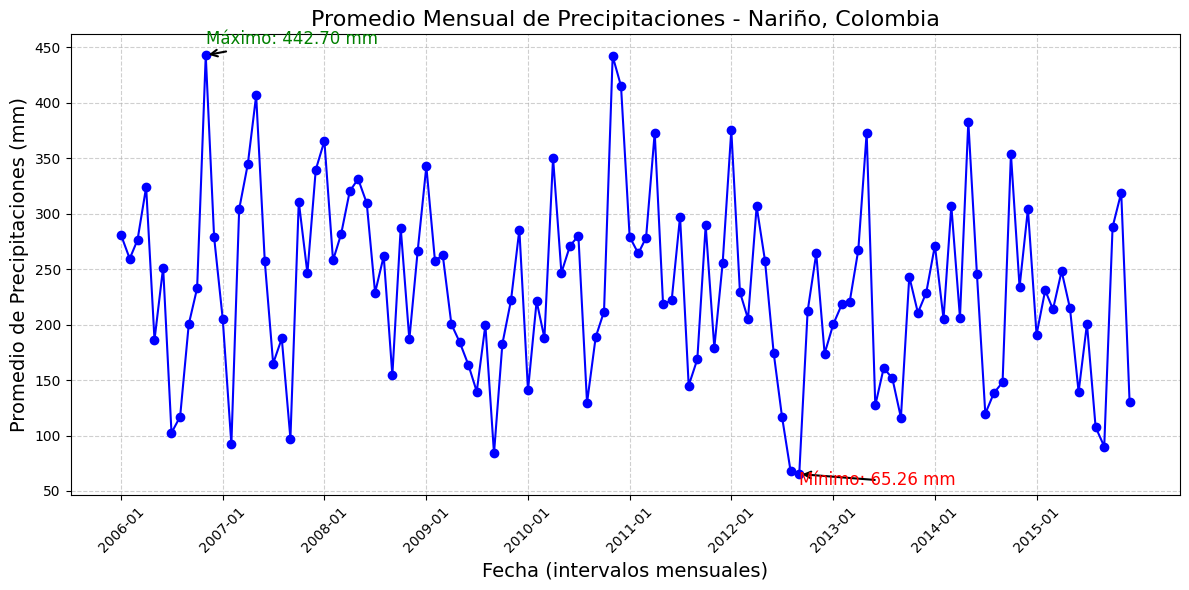

In [10]:
import matplotlib.pyplot as plt

# Calcular el promedio de precipitaciones por cada fecha
promedios_por_fecha = lluvias_df.groupby("FechaMensual")["Valor"].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_fecha.max()
fecha_maximo = promedios_por_fecha.idxmax()
valor_minimo = promedios_por_fecha.min()
fecha_minimo = promedios_por_fecha.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_fecha.index,
    promedios_por_fecha.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Promedio Mensual de Precipitaciones - Nariño, Colombia", fontsize=16)
plt.xlabel("Fecha (intervalos mensuales)", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(fecha_maximo, valor_maximo),
    xytext=(fecha_maximo, valor_maximo + 10),
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(fecha_minimo, valor_minimo),
    xytext=(fecha_minimo, valor_minimo - 10),
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_fecha.index[::12],  # Mostrar un label cada 12 meses (1 año)
    [
        fecha.strftime("%Y-%m") for fecha in promedios_por_fecha.index[::12]
    ],  # Formato año-mes
    rotation=45,
    fontsize=10,
)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

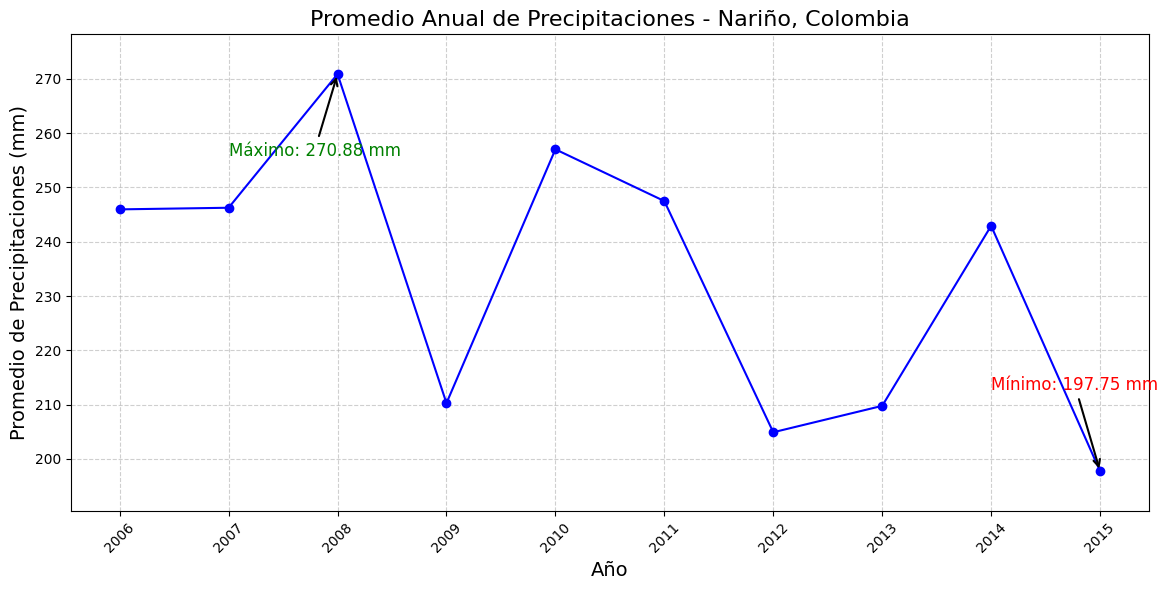

In [11]:
# Calcular el promedio de precipitaciones por cada año usando el índice de fechas
promedios_por_ano = lluvias_df.groupby(lluvias_df.index.year)["Valor"].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_ano.max()
ano_maximo = promedios_por_ano.idxmax()
valor_minimo = promedios_por_ano.min()
ano_minimo = promedios_por_ano.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_ano.index,
    promedios_por_ano.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Promedio Anual de Precipitaciones - Nariño, Colombia", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(ano_maximo, valor_maximo),
    xytext=(ano_maximo - 1, valor_maximo - 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(ano_minimo, valor_minimo),
    xytext=(ano_minimo - 1, valor_minimo + 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_ano.index,
    [str(ano) for ano in promedios_por_ano.index],
    rotation=45,
    fontsize=10,
)

# Añadir un poco de margen para asegurar que las anotaciones sean visibles
plt.margins(x=0.05, y=0.1)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

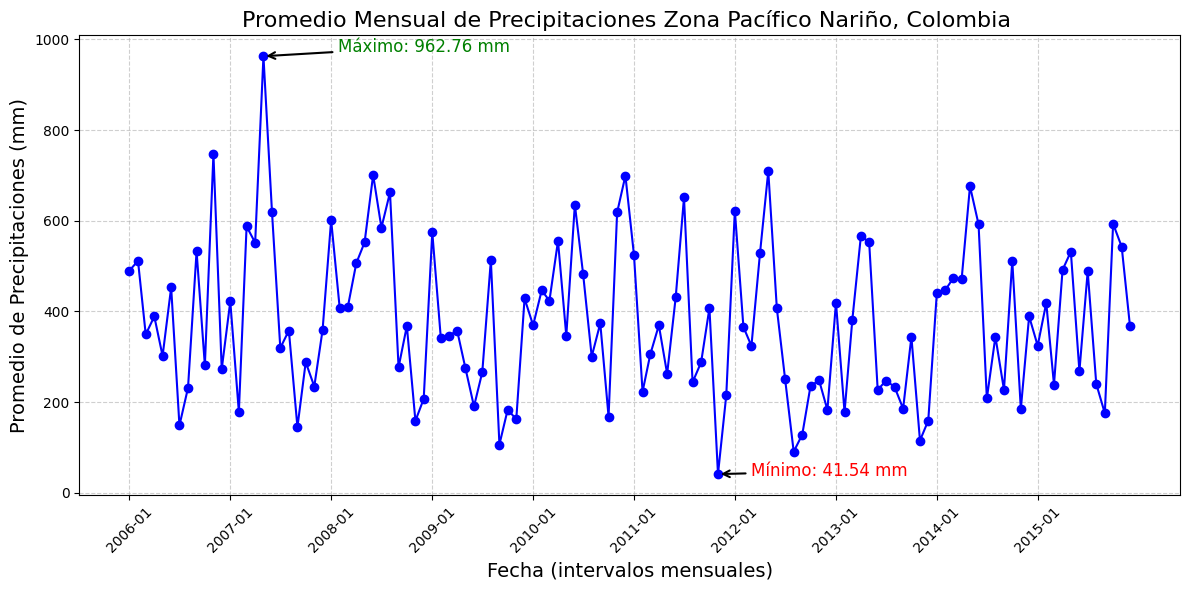

In [12]:
id_estaciones_pacifico = [53020010, 51035020, 52070010, 53010020, 52065020]
estaciones_filtradas = lluvias_df[
    lluvias_df["CodigoEstacion"].isin(id_estaciones_pacifico)
]
# Calcular el promedio de precipitaciones por cada fecha
promedios_por_fecha = estaciones_filtradas.groupby("FechaMensual")["Valor"].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_fecha.max()
fecha_maximo = promedios_por_fecha.idxmax()
valor_minimo = promedios_por_fecha.min()
fecha_minimo = promedios_por_fecha.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_fecha.index,
    promedios_por_fecha.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title(
    "Promedio Mensual de Precipitaciones Zona Pacífico Nariño, Colombia ", fontsize=16
)
plt.xlabel("Fecha (intervalos mensuales)", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(fecha_maximo, valor_maximo),
    xytext=(fecha_maximo + pd.Timedelta(days=270), valor_maximo + 10),
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(fecha_minimo, valor_minimo),
    xytext=(fecha_minimo + pd.Timedelta(days=120), valor_minimo - 5),
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_fecha.index[::12],  # Mostrar un label cada 12 meses (1 año)
    [
        fecha.strftime("%Y-%m") for fecha in promedios_por_fecha.index[::12]
    ],  # Formato año-mes
    rotation=45,
    fontsize=10,
)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

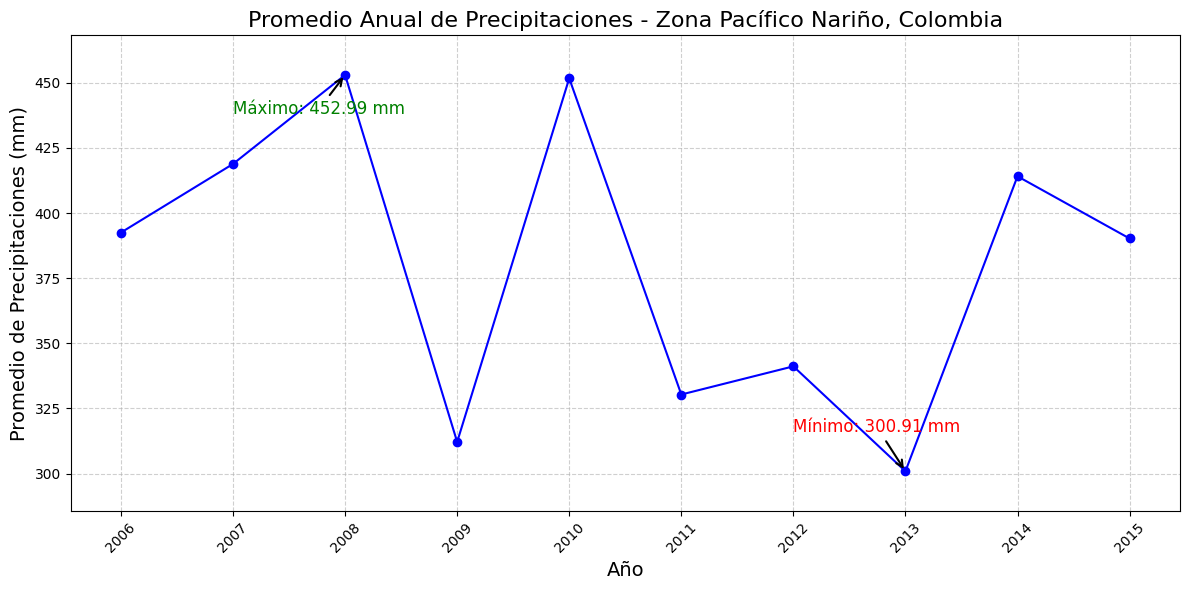

In [13]:
# Calcular el promedio de precipitaciones por cada año usando el índice de fechas
id_estaciones_pacifico = [53020010, 51035020, 52070010, 53010020, 52065020]
estaciones_filtradas = lluvias_df[
    lluvias_df["CodigoEstacion"].isin(id_estaciones_pacifico)
]
promedios_por_ano = estaciones_filtradas.groupby(estaciones_filtradas.index.year)[
    "Valor"
].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_ano.max()
ano_maximo = promedios_por_ano.idxmax()
valor_minimo = promedios_por_ano.min()
ano_minimo = promedios_por_ano.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_ano.index,
    promedios_por_ano.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title(
    "Promedio Anual de Precipitaciones - Zona Pacífico Nariño, Colombia", fontsize=16
)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(ano_maximo, valor_maximo),
    xytext=(ano_maximo - 1, valor_maximo - 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(ano_minimo, valor_minimo),
    xytext=(ano_minimo - 1, valor_minimo + 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_ano.index,
    [str(ano) for ano in promedios_por_ano.index],
    rotation=45,
    fontsize=10,
)

# Añadir un poco de margen para asegurar que las anotaciones sean visibles
plt.margins(x=0.05, y=0.1)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

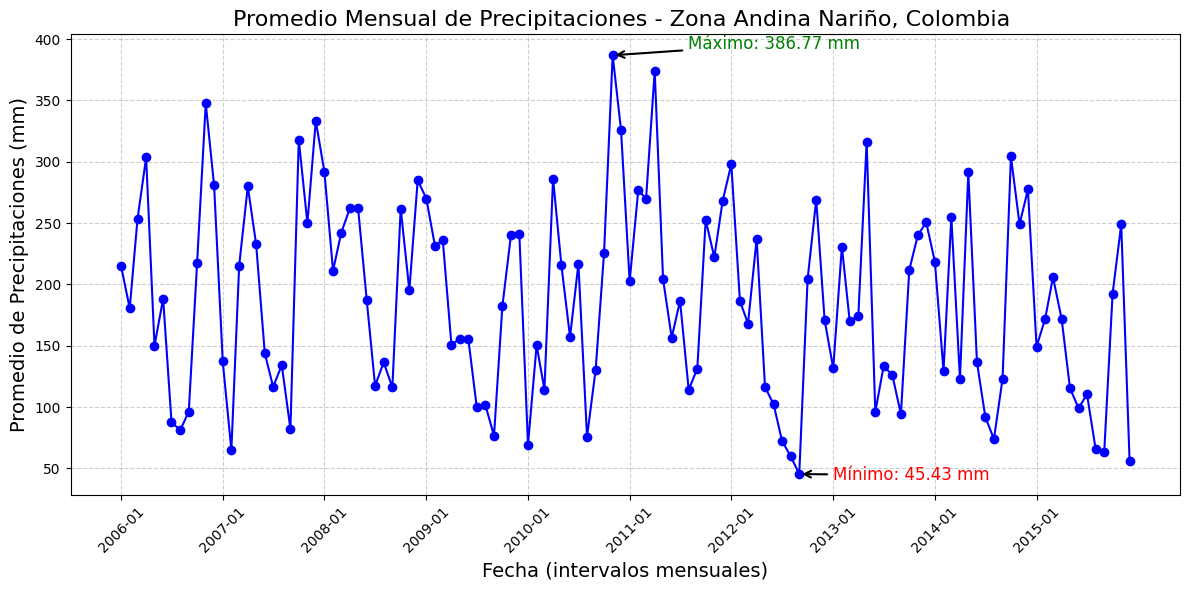

In [14]:
id_estaciones_pacifico = [53020010, 51035020, 52070010, 53010020, 52065020]
estaciones_filtradas = lluvias_df[
    ~lluvias_df["CodigoEstacion"].isin(id_estaciones_pacifico)
]
# Calcular el promedio de precipitaciones por cada fecha
promedios_por_fecha = estaciones_filtradas.groupby("FechaMensual")["Valor"].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_fecha.max()
fecha_maximo = promedios_por_fecha.idxmax()
valor_minimo = promedios_por_fecha.min()
fecha_minimo = promedios_por_fecha.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_fecha.index,
    promedios_por_fecha.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title(
    "Promedio Mensual de Precipitaciones - Zona Andina Nariño, Colombia ", fontsize=16
)
plt.xlabel("Fecha (intervalos mensuales)", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(fecha_maximo, valor_maximo),
    xytext=(fecha_maximo + pd.Timedelta(days=270), valor_maximo + 5),
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(fecha_minimo, valor_minimo),
    xytext=(fecha_minimo + pd.Timedelta(days=120), valor_minimo - 5),
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_fecha.index[::12],  # Mostrar un label cada 12 meses (1 año)
    [
        fecha.strftime("%Y-%m") for fecha in promedios_por_fecha.index[::12]
    ],  # Formato año-mes
    rotation=45,
    fontsize=10,
)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

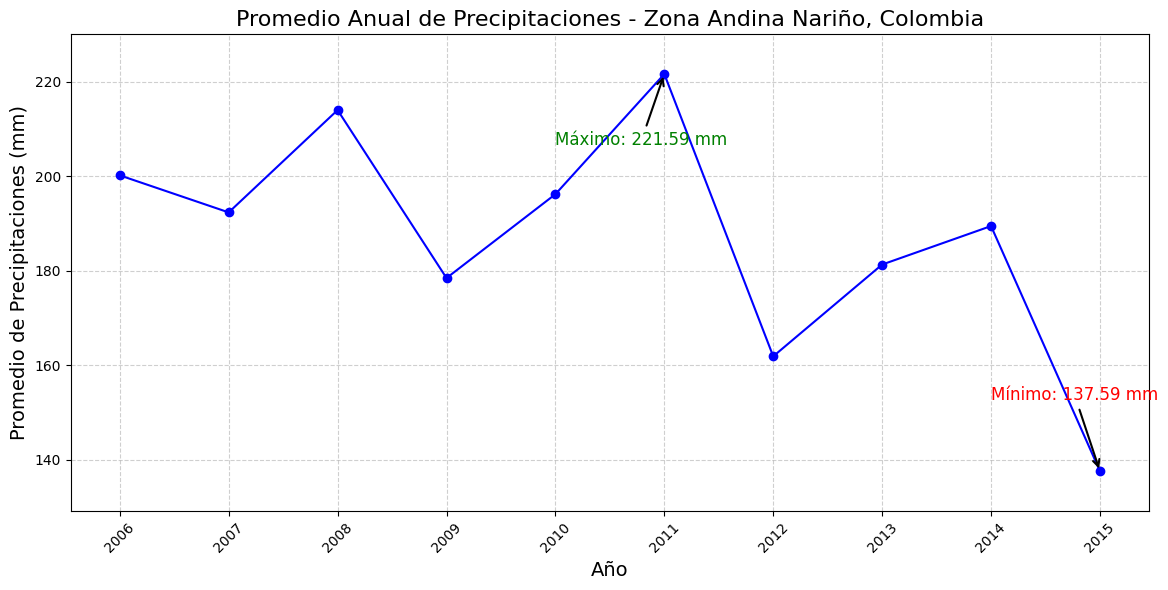

In [15]:
# Calcular el promedio de precipitaciones por cada año usando el índice de fechas
id_estaciones_pacifico = [53020010, 51035020, 52070010, 53010020, 52065020]
estaciones_filtradas = lluvias_df[
    ~lluvias_df["CodigoEstacion"].isin(id_estaciones_pacifico)
]
promedios_por_ano = estaciones_filtradas.groupby(estaciones_filtradas.index.year)[
    "Valor"
].mean()

# Encontrar los valores máximo y mínimo
valor_maximo = promedios_por_ano.max()
ano_maximo = promedios_por_ano.idxmax()
valor_minimo = promedios_por_ano.min()
ano_minimo = promedios_por_ano.idxmin()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(
    promedios_por_ano.index,
    promedios_por_ano.values,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Promedio Anual de Precipitaciones - Zona Andina Nariño, Colombia", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Promedio de Precipitaciones (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Anotar el valor máximo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Máximo: {valor_maximo:.2f} mm",
    xy=(ano_maximo, valor_maximo),
    xytext=(ano_maximo - 1, valor_maximo - 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="green", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="green",
)

# Anotar el valor mínimo - ajustado para aparecer dentro del gráfico
plt.annotate(
    f"Mínimo: {valor_minimo:.2f} mm",
    xy=(ano_minimo, valor_minimo),
    xytext=(ano_minimo - 1, valor_minimo + 15),  # Ajustado el xytext
    arrowprops=dict(facecolor="red", arrowstyle="->", lw=1.5),
    fontsize=12,
    color="red",
)

# Ajustar etiquetas del eje X
plt.xticks(
    promedios_por_ano.index,
    [str(ano) for ano in promedios_por_ano.index],
    rotation=45,
    fontsize=10,
)

# Añadir un poco de margen para asegurar que las anotaciones sean visibles
plt.margins(x=0.05, y=0.1)

plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [16]:
print(lluvias_df.columns)
print(lluvias_df.info())

Index(['CodigoEstacion', 'Valor'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2006-01-01 to 2012-07-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodigoEstacion  2520 non-null   int64  
 1   Valor           2518 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 59.1 KB
None


In [17]:
merged_df = pd.merge(  # noqa: PD015
    lluvias_df,
    mma_df,
    how="right",
    left_on=["CodigoEstacion", "FechaMensual"],
    right_on=["CodigoEstacion", "FechaMensual"],
)

# Mostrar una vista previa de los datos combinados
merged_df.head()

,CodigoEstacion,FechaMensual,Valor,NombreEstacion,Latitud,Longitud,Municipio,Ubicacion
0,52065020,2015-11-01,843.6,BARBACOAS,"1,6711084","-78,139393",Barbacoas1,zona urbana
1,52065020,2014-08-01,634.8,BARBACOAS,"1,6773784","-78,1298776",Barbacoas2,vda la cierra mina
2,52065020,2014-02-01,524.0,BARBACOAS,"1,5065","-78,0797222",Barbacoas3,via junin - barbacoas
3,52065020,2007-10-01,388.0,BARBACOAS,"1,6711084","-78,1431696",Barbacoas7,NoRegister
4,52040160,2015-04-01,144.3,BERRUECOS,"1,4665276","-77,0429749",Alban1,Sector El Socorro


In [18]:
# Calcular la media de  las precipitaciones  por mes para cada estación

estaciones = merged_df["CodigoEstacion"].unique()
print(estaciones)
conteo_estaciones = merged_df.groupby("CodigoEstacion").size()

# Mostrar el conteo
print(conteo_estaciones)

[52065020 52040160 51035020 53020010 52050130 52050110 52055220 51020010
 52030090 52070030 52070010 52010060 47015080 53010020 52060050 52050040
 52050190 52050080 52060040 52035040 52045070]
CodigoEstacion
47015080      4
51020010     22
51035020      1
52010060     23
52030090     39
52035040     33
52040160    194
52045070     40
52050040    129
52050080     60
52050110     21
52050130      5
52050190     52
52055220     59
52060040     24
52060050      9
52065020      4
52070010      2
52070030     20
53010020      2
53020010      2
dtype: int64


In [19]:
# Filtrar los datos que pertenezcan únicamente a 'BARBACOAS [52065020]'
filtered_df = merged_df[merged_df["CodigoEstacion"] == 52040160]

filtered_df.head()

,CodigoEstacion,FechaMensual,Valor,NombreEstacion,Latitud,Longitud,Municipio,Ubicacion
4,52040160,2015-04-01,144.3,BERRUECOS,"1,4665276","-77,0429749",Alban1,Sector El Socorro
5,52040160,2011-02-01,295.4,BERRUECOS,"1,4728684","-77,067959",Alban10,NoRegister
6,52040160,2011-02-01,295.4,BERRUECOS,"1,4728684","-77,067959",Alban11,NoRegister
7,52040160,2010-12-01,280.1,BERRUECOS,"1,45037","-77,07102",Alban12,Centro Educativo San Bosco
8,52040160,2010-12-01,280.1,BERRUECOS,"1,4597936","-77,0596195",Alban12,Centro educativo el Socorro


/var/folders/m6/7mj8vx8n2nz65z01dfkj5_0w0000gn/T/ipykernel_83289/2682720168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Valor"] = filtered_df["Valor"].replace(",", ".", regex=True).astype(float)


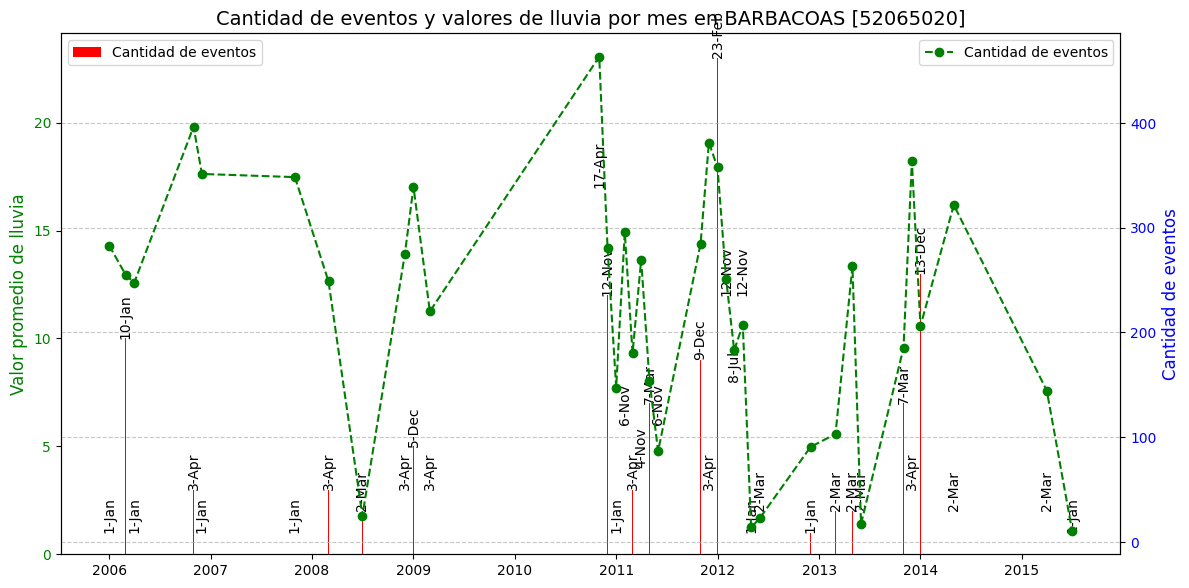

In [20]:
import matplotlib.pyplot as plt

# Contar la cantidad de eventos por mes para BARBACOAS [52065020]
event_counts = filtered_df["FechaMensual"].value_counts().sort_index()
filtered_df["Valor"] = filtered_df["Valor"].replace(",", ".", regex=True).astype(float)

# Agrupar los datos para obtener los valores promedio de lluvia por mes
rainfall_values = filtered_df.groupby("FechaMensual")["Valor"].mean()
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar los valores de lluvia promedio como barras
bars = ax1.bar(
    event_counts.index,
    event_counts.values,
    color="red",
    label="Cantidad de eventos",
)

# # Agregar los valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.0f}-{event_counts.index[height-1].strftime('%b')}",
        ha="center",
        va="bottom",
        fontsize=10,
        rotation=90,
    )

# Configurar el eje y para los valores de lluvia
ax1.set_ylabel("Valor promedio de lluvia", fontsize=12, color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Crear un segundo eje para la cantidad de eventos
ax2 = ax1.twinx()
ax2.plot(
    rainfall_values.index,
    rainfall_values.values,
    color="green",
    marker="o",
    label="Cantidad de eventos",
    linestyle="--",
)
ax2.set_ylabel("Cantidad de eventos", fontsize=12, color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Configurar la gráfica
plt.title(
    "Cantidad de eventos y valores de lluvia por mes en BARBACOAS [52065020]", fontsize=14
)
plt.xlabel("Mes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
fig.tight_layout()

# Agregar leyendas
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Mostrar la gráfica
plt.show()

DatetimeIndex(['2006-01-01', '2006-03-01', '2006-04-01', '2006-11-01',
               '2006-12-01', '2007-11-01', '2008-03-01', '2008-07-01',
               '2008-12-01', '2009-01-01', '2009-03-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-12-01',
               '2013-03-01', '2013-05-01', '2013-06-01', '2013-11-01',
               '2013-12-01', '2014-01-01', '2014-05-01', '2015-04-01',
               '2015-07-01'],
              dtype='datetime64[ns]', name='FechaMensual', freq=None)
[ 1 10  1  3  1  1  3  2  3  5  3 17 12  1  6  3  4  7  6  9  3 23 12  8
 12  1  2  1  2  2  2  7  3 13  2  2  1]
Index(['Jan-2006', 'Feb-2006', 'Mar-2006', 'Apr-2006', 'May-2006', 'Jun-2006',
       'Jul-2006', 'Aug-2006', 'Sep-2006', 'Oct-2006',
       ...
  

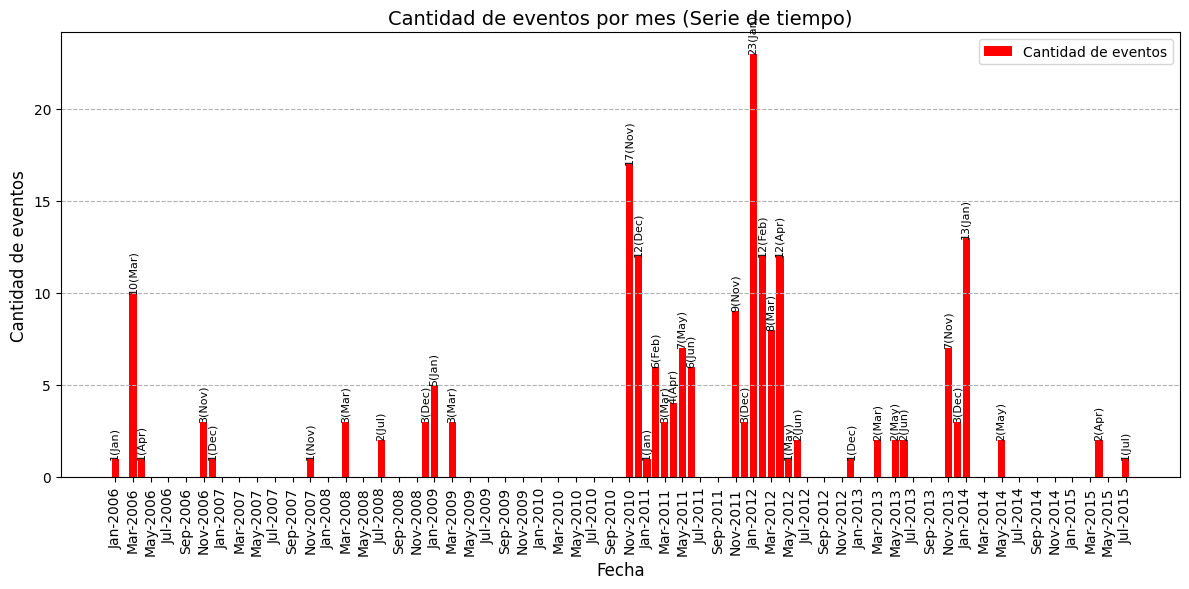

In [21]:
# Crear una gráfica de barras para una serie de tiempo
plt.figure(figsize=(12, 6))
print(event_counts.index)
print(event_counts.values)
full_index = pd.date_range(
    start=event_counts.index.min(), end=event_counts.index.max(), freq="MS"
)
# Reconstruir la serie con el índice completo, rellenando los valores faltantes con 0
event_counts_full = event_counts.reindex(full_index, fill_value=0)

# Convertir el índice nuevamente al formato "Mes-Año"
event_counts_full.index = event_counts_full.index.strftime("%b-%Y")
print(event_counts_full.index)
print(event_counts_full.values)
# Graficar las barras de la serie de tiempo
bar2 = plt.bar(
    event_counts_full.index,
    event_counts_full.values,
    color="red",
    label="Cantidad de eventos",
)

# Agregar los valores sobre cada barra
for bar, label in zip(bar2, event_counts_full.index):
    height = bar.get_height()
    if height > 0:  # Mostrar solo para barras con valores mayores a 0
        month = label.split("-")[0]
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.0f}({month})",  # Mes y cantidad
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=90,
        )

# Agregar títulos y etiquetas
plt.title("Cantidad de eventos por mes (Serie de tiempo)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Cantidad de eventos", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--")

plt.xticks(ticks=range(0, len(event_counts_full), 2), rotation=90, fontsize=10)

# Mostrar la gráfica
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# pearson
from scipy import stats

stats.pearsonr(event_counts_full.values, rainfall_values.values)

ValueError: x and y must have the same length.